# Project: Wrangling and Analyze Data

## Data Gathering

In [1]:
# Importing packages
import pandas as pd
pd.set_option('display.max_columns', 40)
import requests

In [2]:
# Loading the twitter-archive dataset
rate_dogs = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Using the requests library to download the tweet image prediction file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Save HTML to file
with open("image-predictions.tsv", mode='wb') as file:
    file.write(response.content)
    
# Load the file into a dataframe using pandas
images = pd.read_csv('image-predictions.tsv', sep='\t')

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = rate_dogs.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [ ]:
# Additional data via the Twitter API 
with open("tweet-json.txt")as file:
    lines = file.readlines()
tweets_json = []
for line in lines:
    tweets_json.append(json.loads(line))
# Load the file into a dataframe using pandas
tweets = pd.DataFrame(tweets_json, columns=['id', 'retweet_count', 'favorite_count'])

In [4]:
all_tweets = pd.read_json('tweet-json.txt', lines=True)
tweets = all_tweets[['id', 'retweet_count', 'favorite_count']]

## Assessing Data

In [5]:
rate_dogs.head(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [6]:
# Summary Information
rate_dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [7]:
# Summary statistics
rate_dogs.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [8]:
# Checking rating_denominator column
denomiators = rate_dogs[['rating_numerator','rating_denominator']]
denomiators = denomiators[denomiators['rating_denominator'] != 10]
denomiators

,rating_numerator,rating_denominator
313,960,0
342,11,15
433,84,70
516,24,7
784,9,11
902,165,150
1068,9,11
1120,204,170
1165,4,20
1202,50,50


In [9]:
# Viewing image_prediction data
images.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [97]:
rate_dogs.name.nunique()

957

In [11]:
# Summary Information
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
# Summary statistics
images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [13]:
# Viewing Twitter API data
tweets.sample(3)

,id,retweet_count,favorite_count
50,882268110199369728,12118,45880
813,771014301343748096,1782,7032
417,822462944365645825,17209,31800


In [14]:
# Summary statistics
tweets.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [15]:
# Summary Information
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Quality issues
##### `rate_dogs` table

> 1. Removing retweeted and reply rows

> 2. Numerator rating extracted incorrectly

> 3. Inconsitency with rating_denominators

> 4. Erroneous data type for most column names

> 5. Rating of dogs ought to be scaled in a single column instead of having numerator and denominator separately

> 6. Extreme values in ratings both for numerators and denominators suggesting outliers

> 7. Clean all invalid names 


##### `tweets` table


> 8. Unmatching column name that will prevent merging of `tweet-json.txt` and `twitter-archive-enhanced` dataset (i.e id instead of tweet_id)
 
 

### Tidiness issues
> 1. All four values `doggo`,`floofer`,`pupper`,`puppo` ought to be in one column `dog_stage` from the 'twitter-archive-enhanced' dataset

> 2. All three datasets should be represented as one single dataset

## Cleaning Data

In [16]:
# Make copies of original pieces of data
rate_dogs_clean = rate_dogs.copy()
images_clean = images.copy()
tweets_clean = tweets.copy()

### Issue #1: Dog stages in different columns

#### Define: All four values `doggo`,`floofer`,`pupper`,`puppo` ought to be in one column `dog_stage` from the 'rate_dogs' table, applying string concat method and renaming the different stages (tidiness issue)

#### Code

In [17]:
rate_dogs_clean['dog_stage'] = rate_dogs_clean['doggo'].str.cat(rate_dogs_clean[['floofer','pupper','puppo']], sep='-')

In [18]:
rate_dogs_clean['dog_stage'].value_counts()

None-None-None-None        1976
None-None-pupper-None       245
doggo-None-None-None         83
None-None-None-puppo         29
doggo-None-pupper-None       12
None-floofer-None-None        9
doggo-None-None-puppo         1
doggo-floofer-None-None       1
Name: dog_stage, dtype: int64

In [19]:
rate_dogs_clean['dog_stage'] = rate_dogs_clean['dog_stage'].map({'None-None-None-None':'None', 'None-None-pupper-None':'pupper', 'doggo-None-None-None':'doggo',
                                 'None-None-None-puppo':'puppo','doggo-None-pupper-None':'doggo-pupper', 'None-floofer-None-None':'floofer',
                                 'doggo-None-None-puppo':'doggo-puppo', 'doggo-floofer-None-None':'doggo-floofer'})

In [20]:
rate_dogs_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

#### Test

In [21]:
rate_dogs_clean.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
2148,669749430875258880,NaN,NaN,2015-11-26 05:28:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Clarence. Clarence thought he saw...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669749430...,8,10,Clarence,None
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None
1234,712717840512598017,NaN,NaN,2016-03-23 19:09:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please don't send in any more polar bears. We ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/712717840...,10,10,None,None


In [22]:
rate_dogs_clean.shape

(2356, 14)

### Quality

### Issue #2: Removing retweeted and reply rows

#### Define: Filtering columns where retweeted status id and in reply status id is empty

#### Code

In [23]:
rate_dogs_clean = rate_dogs_clean[pd.isnull(rate_dogs_clean.retweeted_status_id)]
rate_dogs_clean = rate_dogs_clean[pd.isnull(rate_dogs_clean.in_reply_to_status_id)]

#### Test

In [24]:
rate_dogs_clean[pd.notnull(rate_dogs_clean.retweeted_status_id)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


In [25]:
rate_dogs_clean[pd.notnull(rate_dogs_clean.in_reply_to_status_id)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


### Issue #3: Numerator rating extracted incorrectly

#### Define: Extracting the rating from the text column and replacing incorrect rating 

#### Code

In [26]:
# Check for rating with float value form the text column
(rate_dogs_clean[rate_dogs_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']])

C:\Users\user\AppData\Local\Temp\ipykernel_20588\4139072151.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  (rate_dogs_clean[rate_dogs_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']])


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1712,Here we have uncovered an entire battalion of ...,26


In [27]:
# Extracting numerator with float data type from the text column 
rate_dogs_clean['rating_num'] = rate_dogs_clean.text.str.extract("(\d+\.\d*\/\d+)", expand=True)
rate_dogs_clean[pd.notnull(rate_dogs_clean.rating_num)]['rating_num']

45       13.5/10
695      9.75/10
763     11.27/10
1712    11.26/10
Name: rating_num, dtype: object

In [28]:
# Replace values based on affected index
rate_dogs_clean.loc[45,'rating_numerator']=13.5
rate_dogs_clean.loc[695,'rating_numerator']=9.75
rate_dogs_clean.loc[763,'rating_numerator']=11.27
rate_dogs_clean.loc[1712,'rating_numerator']=11.26

In [29]:
rate_dogs_clean.rating_numerator = rate_dogs_clean.rating_numerator.astype('float')

#### Test

In [30]:
rate_dogs_clean[rate_dogs_clean.rating_numerator.index.isin([45,695,763,1712])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,rating_num
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,13.50,10,Bella,None,13.5/10
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,None,9.75/10
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,pupper,11.27/10
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,11.26,10,None,None,11.26/10


### Issue #4: Inconsitency with rating_denominators

#### Define: Filtering columns with denominator equal to 10

#### Code

In [31]:
rate_dogs_clean = rate_dogs_clean[rate_dogs_clean['rating_denominator'] == 10]

#### Test

In [32]:
rate_dogs_clean[rate_dogs_clean['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,rating_num


In [33]:
rate_dogs_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.080000e+03,0.0,0.0,0.0,0.0,2080.000000,2080.0
mean,7.367027e+17,NaN,NaN,NaN,NaN,11.656144,10.0
std,6.724699e+16,NaN,NaN,NaN,NaN,39.789764,0.0
min,6.660209e+17,NaN,NaN,NaN,NaN,0.000000,10.0
25%,6.767367e+17,NaN,NaN,NaN,NaN,10.000000,10.0
50%,7.097095e+17,NaN,NaN,NaN,NaN,11.000000,10.0
75%,7.880674e+17,NaN,NaN,NaN,NaN,12.000000,10.0
max,8.924206e+17,NaN,NaN,NaN,NaN,1776.000000,10.0


### Issue #5: Erroneous data type for certain column names in the dataset

#### Define: Convert to the right datatype using .astype() method

In [34]:
# To category
rate_dogs_clean.tweet_id = rate_dogs_clean.tweet_id.astype('category')

# To float
rate_dogs_clean.rating_numerator = rate_dogs_clean.rating_numerator.astype('float')
rate_dogs_clean.rating_denominator = rate_dogs_clean.rating_denominator.astype('float')

# To datetime
rate_dogs_clean.timestamp = pd.to_datetime(rate_dogs_clean.timestamp)

### Issue #6: Dogs Rating 

#### Define: Rating of dogs by scaling the numerator and denominator columnn into one as percentage

#### Code

In [35]:
rate_dogs_clean['rating(%)'] = round(((rate_dogs_clean['rating_numerator']/rate_dogs_clean['rating_denominator'])*100),0)

#### Test

In [36]:
rate_dogs_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,rating_num,rating(%)
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,NaN,130.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,NaN,130.0


### Issue #7: Extreme values in ratings(%) suggesting outliers in the `twitter-archive-enhanced` dataset

#### Define: Using the interquartile range method for obtaining extreme values and dropping them

#### Code

In [37]:
import numpy as np
from scipy.stats import iqr
np.quantile(rate_dogs_clean['rating(%)'], [0, 0.25, 0.5, 0.75, 0.99, 1])

array([    0.,   100.,   110.,   120.,   140., 17760.])

In [38]:
# Finding outliers
import numpy as np
from scipy.stats import iqr
iqr = iqr(rate_dogs_clean['rating(%)'])
upper_threshold = np.quantile(rate_dogs_clean['rating(%)'], 0.99) + 1.5 * iqr

In [39]:
# printing the upper threshold
outliers = rate_dogs_clean[rate_dogs_clean['rating(%)'] > upper_threshold].index
outliers

Int64Index([979, 2074], dtype='int64')

In [40]:
rate_dogs_clean.drop(outliers, axis=0, inplace = True)

#### Test

In [41]:
rate_dogs_clean.describe()

,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,rating(%)
count,0.0,0.0,0.0,0.0,2078.000000,2078.0,2078.000000
mean,NaN,NaN,NaN,NaN,10.610577,10.0,106.106352
std,NaN,NaN,NaN,NaN,2.149876,0.0,21.498771
min,NaN,NaN,NaN,NaN,0.000000,10.0,0.000000
25%,NaN,NaN,NaN,NaN,10.000000,10.0,100.000000
50%,NaN,NaN,NaN,NaN,11.000000,10.0,110.000000
75%,NaN,NaN,NaN,NaN,12.000000,10.0,120.000000
max,NaN,NaN,NaN,NaN,14.000000,10.0,140.000000


### Issue #8: Invalid names

#### Define: Find all rows where names start with lower case letters and set the name value for those rows to None

#### Code: 

In [42]:
# Select all invalid names(i.e names with lower case
invalid_names = rate_dogs_clean.name[rate_dogs_clean['name'].str.islower()].unique()
invalid_names

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my',
       'his', 'an', 'actually', 'just', 'getting', 'mad', 'unacceptable',
       'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life',
       'light', 'space'], dtype=object)

In [44]:
rate_dogs_clean['name'].str.islower().unique()

array([False,  True])

In [50]:
# Replace invalid names with None
rate_dogs_clean.name = np.where(rate_dogs_clean['name'].str.islower(), 'None', rate_dogs_clean['name'])

#### Test

In [52]:
rate_dogs_clean.name[rate_dogs_clean['name'].str.islower()].unique()

array([], dtype=object)

#### Cleaning

In [53]:
rate_dogs_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'rating_num', 'rating(%)'],
      dtype='object')

In [54]:
# Dropping unneccessary column names
rate_dogs_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id','source', 'text', 'retweeted_status_id', 
                      'retweeted_status_user_id','retweeted_status_timestamp','expanded_urls', 'rating_numerator',
                       'rating_denominator', 'rating_num'], axis=1, inplace=True)

### Issue #9: Unmatching column name that will prevent merging of rate_dogs with tweets table

#### Define: Remaning the unmatching column name that will prevent merging of `tweets` and `rate_dogs` table (i.e id instead of tweet_id) and changing it data type

#### Code

In [55]:
tweets_clean.rename(columns={'id':'tweet_id'}, inplace=True)
tweets_clean.tweet_id = tweets_clean.tweet_id.astype('category')

#### Test

In [56]:
tweets_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

In [57]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   tweet_id        2354 non-null   category
 1   retweet_count   2354 non-null   int64   
 2   favorite_count  2354 non-null   int64   
dtypes: category(1), int64(2)
memory usage: 124.4 KB


### Issue #10(Tidiness): Datasets in different tables

#### Define: Merge three datasets into one master dataset

#### Code

In [58]:
rate_dogs_clean = pd.merge(rate_dogs_clean, tweets_clean,
                            on=['tweet_id'], how='left')

In [59]:
rate_dogs_clean = pd.merge(rate_dogs_clean, images_clean,
                            on=['tweet_id'], how='left')

#### Test

In [60]:
rate_dogs_clean.head()

,tweet_id,timestamp,name,dog_stage,rating(%),retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,Phineas,None,130.0,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,Tilly,None,130.0,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,Archie,None,120.0,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,Darla,None,130.0,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,Franklin,None,120.0,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [61]:
rate_dogs_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data

In [62]:
twitter_df = pd.read_csv('twitter_archive_master.csv')
twitter_df

,tweet_id,timestamp,name,dog_stage,rating(%),retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,Phineas,None,130.0,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,Tilly,None,130.0,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,Archie,None,120.0,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,Darla,None,130.0,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,Franklin,None,120.0,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2073,666049248165822465,2015-11-16 00:24:50+00:00,None,None,50.0,41,111,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
2074,666044226329800704,2015-11-16 00:04:52+00:00,None,None,60.0,147,311,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
2075,666033412701032449,2015-11-15 23:21:54+00:00,None,None,90.0,47,128,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
2076,666029285002620928,2015-11-15 23:05:30+00:00,None,None,70.0,48,132,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


##### Splitting timestamp into days, month and year

In [63]:
# using split
twitter_df[['tweet_year','tweet_month','tweet_day']] = twitter_df['timestamp'].str.split('-', expand=True)

In [64]:
twitter_df.head()

,tweet_id,timestamp,name,dog_stage,rating(%),retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,tweet_year,tweet_month,tweet_day
0,892420643555336193,2017-08-01 16:23:56+00:00,Phineas,None,130.0,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,2017,08,01 16:23:56+00:00
1,892177421306343426,2017-08-01 00:17:27+00:00,Tilly,None,130.0,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,2017,08,01 00:17:27+00:00
2,891815181378084864,2017-07-31 00:18:03+00:00,Archie,None,120.0,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,2017,07,31 00:18:03+00:00
3,891689557279858688,2017-07-30 15:58:51+00:00,Darla,None,130.0,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,2017,07,30 15:58:51+00:00
4,891327558926688256,2017-07-29 16:00:24+00:00,Franklin,None,120.0,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,2017,07,29 16:00:24+00:00


In [65]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2078 entries, 0 to 2077
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        2078 non-null   int64  
 1   timestamp       2078 non-null   object 
 2   name            2078 non-null   object 
 3   dog_stage       2078 non-null   object 
 4   rating(%)       2078 non-null   float64
 5   retweet_count   2078 non-null   int64  
 6   favorite_count  2078 non-null   int64  
 7   jpg_url         1952 non-null   object 
 8   img_num         1952 non-null   float64
 9   p1              1952 non-null   object 
 10  p1_conf         1952 non-null   float64
 11  p1_dog          1952 non-null   object 
 12  p2              1952 non-null   object 
 13  p2_conf         1952 non-null   float64
 14  p2_dog          1952 non-null   object 
 15  p3              1952 non-null   object 
 16  p3_conf         1952 non-null   float64
 17  p3_dog          1952 non-null   o

In [66]:
twitter_df['tweet_year'] = twitter_df['tweet_year'].astype(int)
twitter_df['tweet_month'] = twitter_df['tweet_month'].astype(int)

### Research Question 1: What month and year do we have the highest and lowest tweets?

#### Tweets by month and year

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(12,4)})

In [68]:
twitter_df['tweet_month'] = twitter_df['tweet_month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

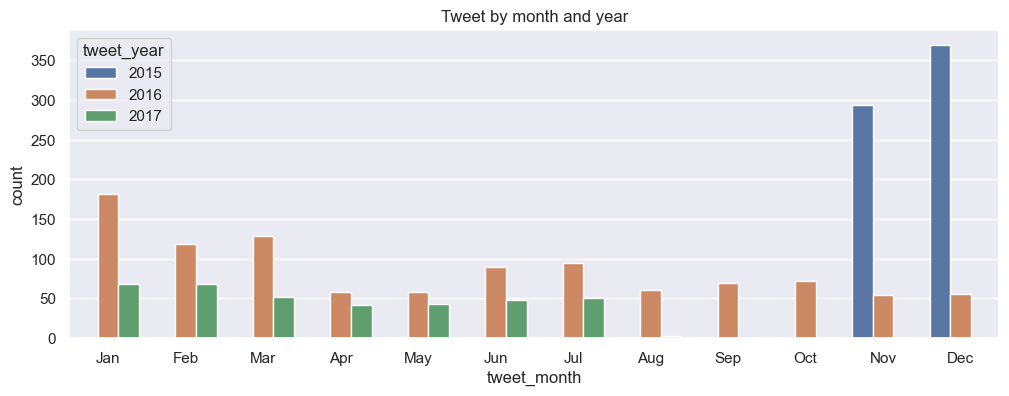

In [69]:
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.countplot(x='tweet_month', hue="tweet_year", order=month_names, data=twitter_df).set_title('Tweet by month and year');

### Research Question 2: Which dogs have the highest average ratings?

#### Checking average dog rates by dog name

In [72]:
dog_rate_df = twitter_df[['name', 'dog_stage', 'rating(%)','retweet_count', 'favorite_count',]]
rating = dog_rate_df.groupby('name').mean()['rating(%)'].sort_values(ascending=False).head(15)
rating

C:\Users\user\AppData\Local\Temp\ipykernel_20588\3578919760.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rating = dog_rate_df.groupby('name').mean()['rating(%)'].sort_values(ascending=False).head(15)


name
Cermet      140.0
Kuyu        140.0
Iggy        140.0
General     140.0
Clifford    140.0
Smiley      140.0
Emmy        140.0
Laika       140.0
Doobert     140.0
Sundance    140.0
Rizzo       130.0
Canela      130.0
Lilly       130.0
Wiggles     130.0
Rudy        130.0
Name: rating(%), dtype: float64

In [96]:
twitter_df[twitter_df['name'] == 'Rizzo'][['name','jpg_url']]

,name,jpg_url
529,Rizzo,https://pbs.twimg.com/media/Cum5LlfWAAAyPcS.jpg


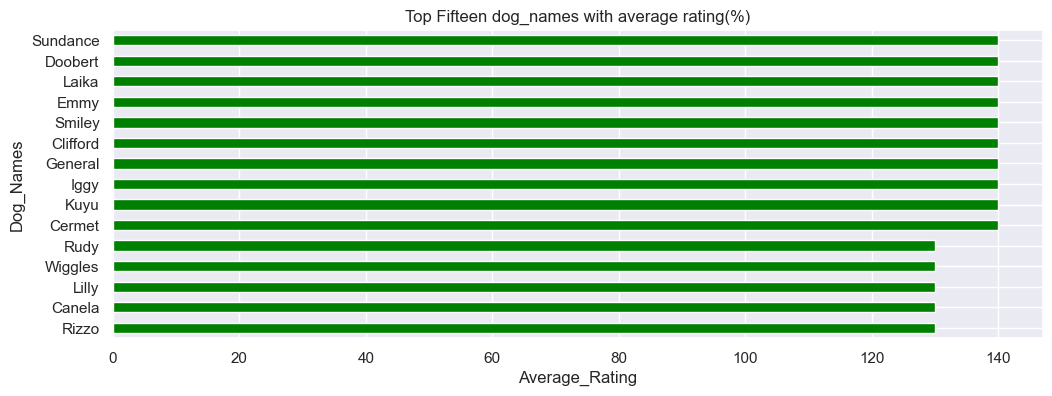

In [76]:
rating.sort_values(ascending=True).plot(kind='barh',color='green', title='Top Fifteen dog_names with average rating(%)', xlabel='Average_Rating', ylabel='Dog_Names');

### Research Question 3: Which dog has the highest retweets and likes(favorite) count?

#### Visualizing Retweet counts and Favourite counts

In [77]:
# Checking the number of dogs with missing names
twitter_df.groupby('name').sum()[['retweet_count','favorite_count']].sort_values(by='retweet_count').tail(5)

C:\Users\user\AppData\Local\Temp\ipykernel_20588\2540052158.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  twitter_df.groupby('name').sum()[['retweet_count','favorite_count']].sort_values(by='retweet_count').tail(5)


,retweet_count,favorite_count
name,,
Buddy,39599,77940
Duddles,45849,107956
Stephan,56625,107015
Bo,73800,185922
None,2081365,5748522


In [79]:
# Filtering dog_names not missing
name_df = dog_rate_df[dog_rate_df['name'] != 'None']

C:\Users\user\AppData\Local\Temp\ipykernel_20588\2159313276.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  name_df.groupby('name').sum()['retweet_count'].sort_values(ascending=False).head(10).plot(kind='barh', color='green', ax=axes[0])
C:\Users\user\AppData\Local\Temp\ipykernel_20588\2159313276.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  name_df.groupby('name').sum()['favorite_count'].sort_values(ascending=False).head(10).plot(kind='barh', color='green', ax=axes[1])


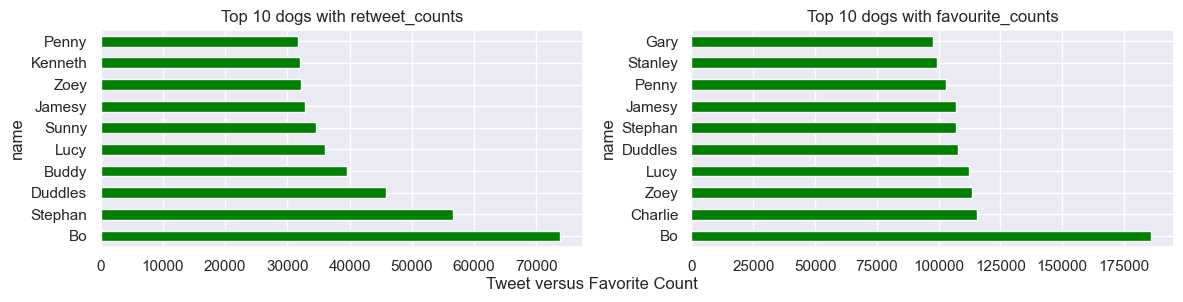

In [81]:
fig, axes = plt.subplots(1,2, figsize=(12,3))

name_df.groupby('name').sum()['retweet_count'].sort_values(ascending=False).head(10).plot(kind='barh', color='green', ax=axes[0])
name_df.groupby('name').sum()['favorite_count'].sort_values(ascending=False).head(10).plot(kind='barh', color='green', ax=axes[1])
 
axes[0].set_title('Top 10 dogs with retweet_counts')
axes[1].set_title('Top 10 dogs with favourite_counts')

fig.text(0.5, 0.01, 'Tweet versus Favorite Count', ha='center')
plt.tight_layout();

### Insights:
> 1. From the countplot showing tweets by year and month it can be observed that the WeRateDog tweets campaign had it highest engagement the the second month of it's commencment(i.e Dec 2015)and the lowest in the last month of the campaign (July 2017)

> 2. There seems to be a high level of tie in the dog average ratings suggesting the dogs are quite wonderful

> 3. There's a level of relationships between sum of retweet and favourite counts, with dog Bo having the highest sum in both the retweet and favorite count. Also a large sum of dog names were missing.

### Rersearch Question 4: What type of relationhip do we have between the retweet and favorite count?

### Visualization

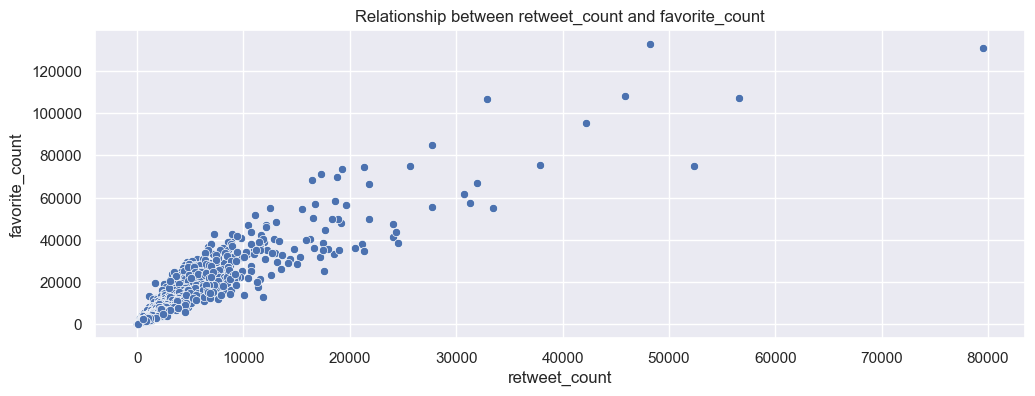

In [82]:
sns.scatterplot(twitter_df,x='retweet_count',y='favorite_count').set(title='Relationship between retweet_count and favorite_count');

In [83]:
# Checking the relationship between retweet and favorite count
twitter_df['retweet_count'].corr(twitter_df['favorite_count'])

0.9113271437158801


#### Conclusion: A dog with greater retweets tends to have greater likes(favorite as well)